install lib

In [112]:
pip install scikit-learn pandas seaborn

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

In [21]:
data=pd.read_csv('Loan_Train.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
X=data.iloc[:,0:11]
y=data.iloc[:,12]

In [33]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


find categorical variable

In [53]:
categorical=data.select_dtypes(include=["object","category"]).columns

In [54]:
categorical

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
#for finding unique values
for col in categorical:
    print(data[col].unique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

encoding

In [84]:
encoder=LabelEncoder()
encoded=encoder.fit_transform(data[col])

In [86]:
for col in categorical:
    data[col]=encoder.fit_transform(data[col])

In [87]:
encoded

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

find missing values

In [88]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [113]:
model=DecisionTreeClassifier(max_depth=3,criterion="entropy",random_state=12)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=12)

In [114]:
y_pre=model.predict(X_test)

In [117]:
print("accuracy:",accuracy_score(y_test,y_pre))
print("classification report:\n",classification_report(y_test,y_pre))
print("confusion matrix:",confusion_matrix(y_test,y_pre))

accuracy: 0.8
classification report:
               precision    recall  f1-score   support

           N       0.78      0.50      0.61        58
           Y       0.80      0.94      0.87       127

    accuracy                           0.80       185
   macro avg       0.79      0.72      0.74       185
weighted avg       0.80      0.80      0.79       185

confusion matrix: [[ 29  29]
 [  8 119]]


visualization

In [118]:
feature_names=X_train.columns.tolist()

In [119]:
feature_names

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

[Text(0.4583333333333333, 0.875, 'Credit_History <= 0.5\nentropy = 0.896\nsamples = 429\nvalue = [134, 295]\nclass = 1'),
 Text(0.25, 0.625, 'LoanAmount <= 547.5\nentropy = 0.301\nsamples = 56\nvalue = [53, 3]\nclass = 0'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'Loan_ID <= 313.0\nentropy = 0.225\nsamples = 55\nvalue = [53, 2]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = 0'),
 Text(0.25, 0.125, 'entropy = 0.371\nsamples = 28\nvalue = [26, 2]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.6666666666666666, 0.625, 'LoanAmount <= inf\nentropy = 0.755\nsamples = 373\nvalue = [81, 292]\nclass = 1'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'Loan_ID <= 83.0\nentropy = 0.732\nsamples = 361\nvalue = [74, 287]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.954\nsamples = 48\nvalue = [18, 30]\nclass = 1'),
 Text(0

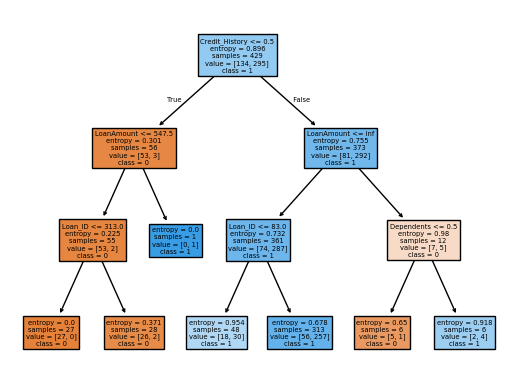

In [120]:
plot_tree(model,feature_names=feature_names,class_names=data['Loan_Status'].unique().astype(str),filled=True)